In [26]:
"""
Support vector Machine
 2. For a given dataset predict number of bikes getting shared based on different parameters 
"""

'\nRandom Forest Regression\n 2. For a given dataset predict number of bikes getting shared based on different parameters \n'

In [43]:
import numpy as np
# import matplotlib.plotly as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd 
#imputer to handle missing data 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# handle categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#regression librarry
from sklearn.svm import SVR
#o check accuracy
from sklearn.metrics import accuracy_score
# to check accuracy
from sklearn.metrics import *
import pickle 
#visualization in 3D
from mpl_toolkits.mplot3d import Axes3D
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import os, sys
import csv

In [2]:
# load dataset
dataset_original = pd.read_csv ("bike_sharing.csv")
dataset = dataset_original
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
# IN simple LR we want only 1 feature and 1 lable
dataset = dataset.loc[:,['temp','cnt']]
# dataset.drop(['dteday'], axis = 1, inplace = True)

In [21]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 17379 rows and 2 Columns


In [22]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
temp    17379 non-null float64
cnt     17379 non-null int64
dtypes: float64(1), int64(1)
memory usage: 271.6 KB


In [23]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,17379.0,0.496987,0.192556,0.02,0.34,0.5,0.66,1.0
cnt,17379.0,189.463088,181.387599,1.00,40.00,142.0,281.00,977.0


In [24]:
# handling missing data if nessesary
"""
if missing values are present
imputer = Imputer(missing_values=0, axis=0)
imputer = imputer.fit(x_data[:, 3:16])
"""
dataset.isnull().sum()

temp    0
cnt     0
dtype: int64

In [25]:
# check for minimum dataset
dataset.min()

temp    0.02
cnt     1.00
dtype: float64

In [26]:
# # Handle Missing data
# def handle_min_values(dataset):
#     # replace min values by mean
#     dataset.replace(0, dataset.mean(), inplace=True)
#     return dataset

# dataset = handle_min_values(dataset)

In [27]:
#check dataset replace with mean or not
dataset.min()

temp    0.02
cnt     1.00
dtype: float64

In [40]:
#Check duplicate value
dataset.duplicated().sum()

7544

In [41]:
# Divide data into features and label
x_data_set = np.array(dataset["temp"])
y_data_set = np.array(pd.DataFrame(dataset.cnt))

In [44]:
#feature scalling (here data will be converted into float)
def feature_scalling(x_data_set,y_data_set):
    sc_x = StandardScaler()
    sc_y = StandardScaler()

    x = sc_x.fit_transform(x_data_set.reshape(-1, 1))
    y = sc_y.fit_transform(y_data_set.reshape(-1, 1))
    
    return x, y, sc_x, sc_y
    
x, y, sc_x, sc_y = feature_scalling(x_data_set,y_data_set)

In [45]:
print("shape of x data",x.shape)
print("shape of y data",y.shape)

shape of x data (17379, 1)
shape of y data (17379, 1)


In [46]:
x

array([[-1.33464759],
       [-1.4385164 ],
       [-1.4385164 ],
       ...,
       [-1.23077877],
       [-1.23077877],
       [-1.23077877]])

In [28]:
# # seperate fetures and label
# x_data = dataset.iloc[:, :-1].values
# y_data = dataset.iloc[:, 1].values

In [29]:
# # handle categorical data
# def handle_categorical_data(x_data):
#     #encode categorical data
#     label_encod = LabelEncoder()
#     x_data[:, 1] = label_encod.fit_transform(x_data[:, 1])
    
#     # one hot encoding
#     onehotencode = OneHotEncoder(categorical_features= [1])
#     x_data = onehotencode.fit_transform(x_data).toarray()
    
#     return x_data
    
# x_data = handle_categorical_data(x_data)

In [30]:
# #convert numpy.ndarray to DataFrame
# x_data = pd.DataFrame(x_data)
# x_data.shape

In [32]:
# create directory to store csv files
os.mkdir("CSV_files")

In [47]:
def csv_file(x_train_data,y_train_data,file_name):
    #load data to csv file
    myData = x_train_data
   
    myFile = open('CSV_files/'+file_name, 'w')  
    with myFile:
        writer = csv.writer(myFile)
        writer.writerows(myData)
   
    colnames=['x'] 
    df = pd.read_csv('CSV_files/'+file_name, names=colnames, header=None)
    # inserting column with static value in data frame 
    df.insert(1, "y", y_train_data)
   
    df.to_csv('CSV_files/'+file_name, index =  False)

In [48]:
# split dataset 
def splitdata(x, y):
    # split train and test data
    x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 1/3, random_state=0)
    print("train : ", x_train.shape,y_train.shape, " test : ", x_test.shape,y_test.shape)
    
    # saving datasets into csv files
    csv_file(x_test,y_test,'test_data.csv')

    # divide train data into train and cross validation 
    x_train_data, x_cv_data, y_train_data, y_cv_data = train_test_split(x_train,y_train,test_size = 0.40,random_state=0)
    print("train : ", x_train_data.shape,y_train_data.shape, " test : ", x_cv_data.shape,y_cv_data.shape)

    #load data into csv for train and cross validation
    csv_file(x_train_data,y_train_data,'train_data.csv')
    csv_file(x_cv_data,y_cv_data,'cv_data.csv') 

splitdata(x, y)


train :  (11586, 1) (11586, 1)  test :  (5793, 1) (5793, 1)
train :  (6951, 1) (6951, 1)  test :  (4635, 1) (4635, 1)


In [49]:
# load dataset
train_dataset = pd.read_csv ("CSV_files/train_data.csv")
print("Dataset has {} rows and {} Columns".format(train_dataset.shape[0],train_dataset.shape[1])) 

Dataset has 6951 rows and 2 Columns


In [50]:
train_dataset.head()

,x,y
0,-1.542385,-1.039037
1,0.327253,-1.000445
2,0.742729,-1.022498
3,-0.919172,-0.879154
4,1.262073,0.036039


y_predict value:  [150.72681963]

 Accuracy train by acc_r2 87.78165691841613

 Accuracy train by mean_ab 99.99029420326467

 visualising using SVR 
 


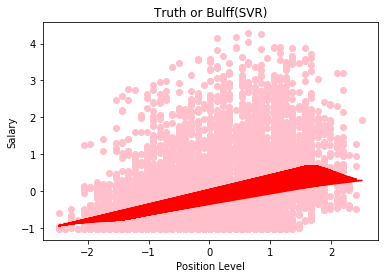

In [55]:
class  SupportVectorReg ():
    
    def create_module(self,x_train,y_train):
        # fitting simple LR to the training set 
        #defualt kernal for non linear module is rbf
        regressor = SVR(kernel= 'rbf')
        regressor.fit(x_train,y_train)
        return regressor

    
    def create_piklefile(self,regression):
        # dump train model pickle file
        file = open('SupportVectorReg.pkl', 'wb')
        pickle.dump(regression,file)
        file.close()          
        
    
    def y_prediction(self,x_train,regressor):
        # predicting the test set result
        # prediction for only 6.5
        y_pred_train = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))
        y_pred_train = regressor.predict(x_train)
#         return y_pred_train

        print("y_predict value: ",sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]])))))
        return y_pred_train
    
    def accuracy(self,y_predict_train,y_train):
        # accuracy using r2 score
        error = r2_score(y_train, y_predict_train)    
        acc_r2 = (1-error)*100
        
        # Calculate accuracy using mean absolute error
        total_error = mean_absolute_error(y_train, y_predict_train)
        mean_ab = ( 1 - total_error/ len(y_train)) *100
        
        median_ab_error = median_absolute_error(y_train, y_predict_train)

        return acc_r2,mean_ab,median_ab_error

    def visualization(self,x,y,regressor):
        # Visualization the Decision Tree result (for higher resolution & smoother curve)
        print("\n visualising using SVR \n ")
        plt.scatter(x, y , color = 'pink')
        plt.plot(x, regressor.predict(x), color = 'red')
        
#         x_grid = np.arange(min(x), max(x), 0.1)
#         x_grid = x_grid.reshape((len(x_grid),1))

#         plt.scatter(x,y, color = 'pink')
#         plt.plot(x_grid, regressor.predict(x_grid), color = 'red')
        plt.title("Truth or Bulff(SVR)")
        plt.xlabel("Position Level")
        plt.ylabel("Salary")
        plt.show()
        

def main():
    #class obj created
    obj  = SupportVectorReg()
    
    # seperate fetures and label
    # here we taking only 2 columns level and salary
    x_train = train_dataset.iloc[:,:-1].values
    y_train = train_dataset.iloc[:,1].values  
    

#     print(x_train.shape, y_train.shape)
    regression = obj.create_module(x_train,y_train)
#     print("\nModule created")

    obj.create_piklefile(regression)
#     print("\nPikle file created")
    
    y_train_pre = obj.y_prediction(x_train,regression)
#     print("\n\n y_prediction:",y_train_pre)
        
    acc_r2,mean_ab,median_ab_error= obj.accuracy(y_train_pre,y_train)
    print("\n Accuracy train by acc_r2", acc_r2)
    print("\n Accuracy train by mean_ab", mean_ab)

    
    #visualisation for train dataset
    obj.visualization(x_train,y_train, regression)

if __name__ == '__main__':
    main()


In [53]:
# Cross Validation

# load dataset
CV_dataset = pd.read_csv ("CSV_files/cv_data.csv")
print("Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 

Dataset has 4635 rows and 2 Columns


y_predict value for 6.5 is  [-0.21356126]


 y_prediction: [-0.26709036 -0.15348765 -0.00570772 ...  0.18257511 -0.17703615
 -0.09838519]

 Accuracy train by acc_r2 85.86905255191188

 Accuracy train by mean_ab 99.98560481162374


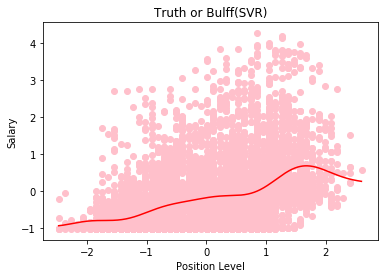

In [56]:
class Cross_validation():
           
    def y_prediction(self,regression, x_train):
        # predicting the test set result
        y_predict = regression.predict(x_train.reshape(-1,1))
        print("y_predict value for 6.5 is ", regression.predict(np.array(6.5).reshape(-1,1)))
        return y_predict
        
#         # predicting the test set result
#         return regression.predict(x_train)
    
    def accuracy(self,y_predict_train,y_train):
        # acc using r2
        error = r2_score(y_train, y_predict_train)    
        acc_r2 = (1-error)*100
        
        # using median_ab_error
        median_ab_error = median_absolute_error(y_train, y_predict_train)
        
        total_error = mean_absolute_error(y_train, y_predict_train)
        mean_ab = ( 1 - total_error/ len(y_train)) *100
        
        return acc_r2,mean_ab,median_ab_error
    
    def visualization(self,x_test,y_test, regressor):
        # Visualization the Decision Tree result (for higher resolution & smoother curve)
        x_grid = np.arange(min(x_test), max(x_test), 0.01)
        x_grid = x_grid.reshape((len(x_grid),1))

        plt.scatter(x_test,y_test, color = 'pink')
        plt.plot(x_grid, regressor.predict(x_grid), color = 'red')
        plt.title("Truth or Bulff(SVR)")
        plt.xlabel("Position Level")
        plt.ylabel("Salary")
        plt.show()
        

def main():
    #class obj created
    obj  = Cross_validation()
    
    # seperate fetures and label
    x_cv = CV_dataset.iloc[:,:-1].values
    y_cv = CV_dataset.iloc[:,1].values
 
    #     print(x_cv.shape,y_cv.shape)
    #cross validation
    file1 = open('SupportVectorReg.pkl', 'rb')
    reg1 = pickle.load(file1)
    
    # y_prediction ( cross validation)   
    y_cv_pre = obj.y_prediction(reg1, x_cv)
    print("\n\n y_prediction:",y_cv_pre)
    
    acc_r2,mean_ab,median_ab_error= obj.accuracy(y_cv_pre,y_cv)
    print("\n Accuracy train by acc_r2", acc_r2)
    print("\n Accuracy train by mean_ab", mean_ab)
#     print("\n Accuracy train by median_ab_error", median_ab_error)

    obj.visualization(x_cv, y_cv, reg1)

if __name__ == '__main__':
    main()
